### Q1: For each waveform determine the peaks and average
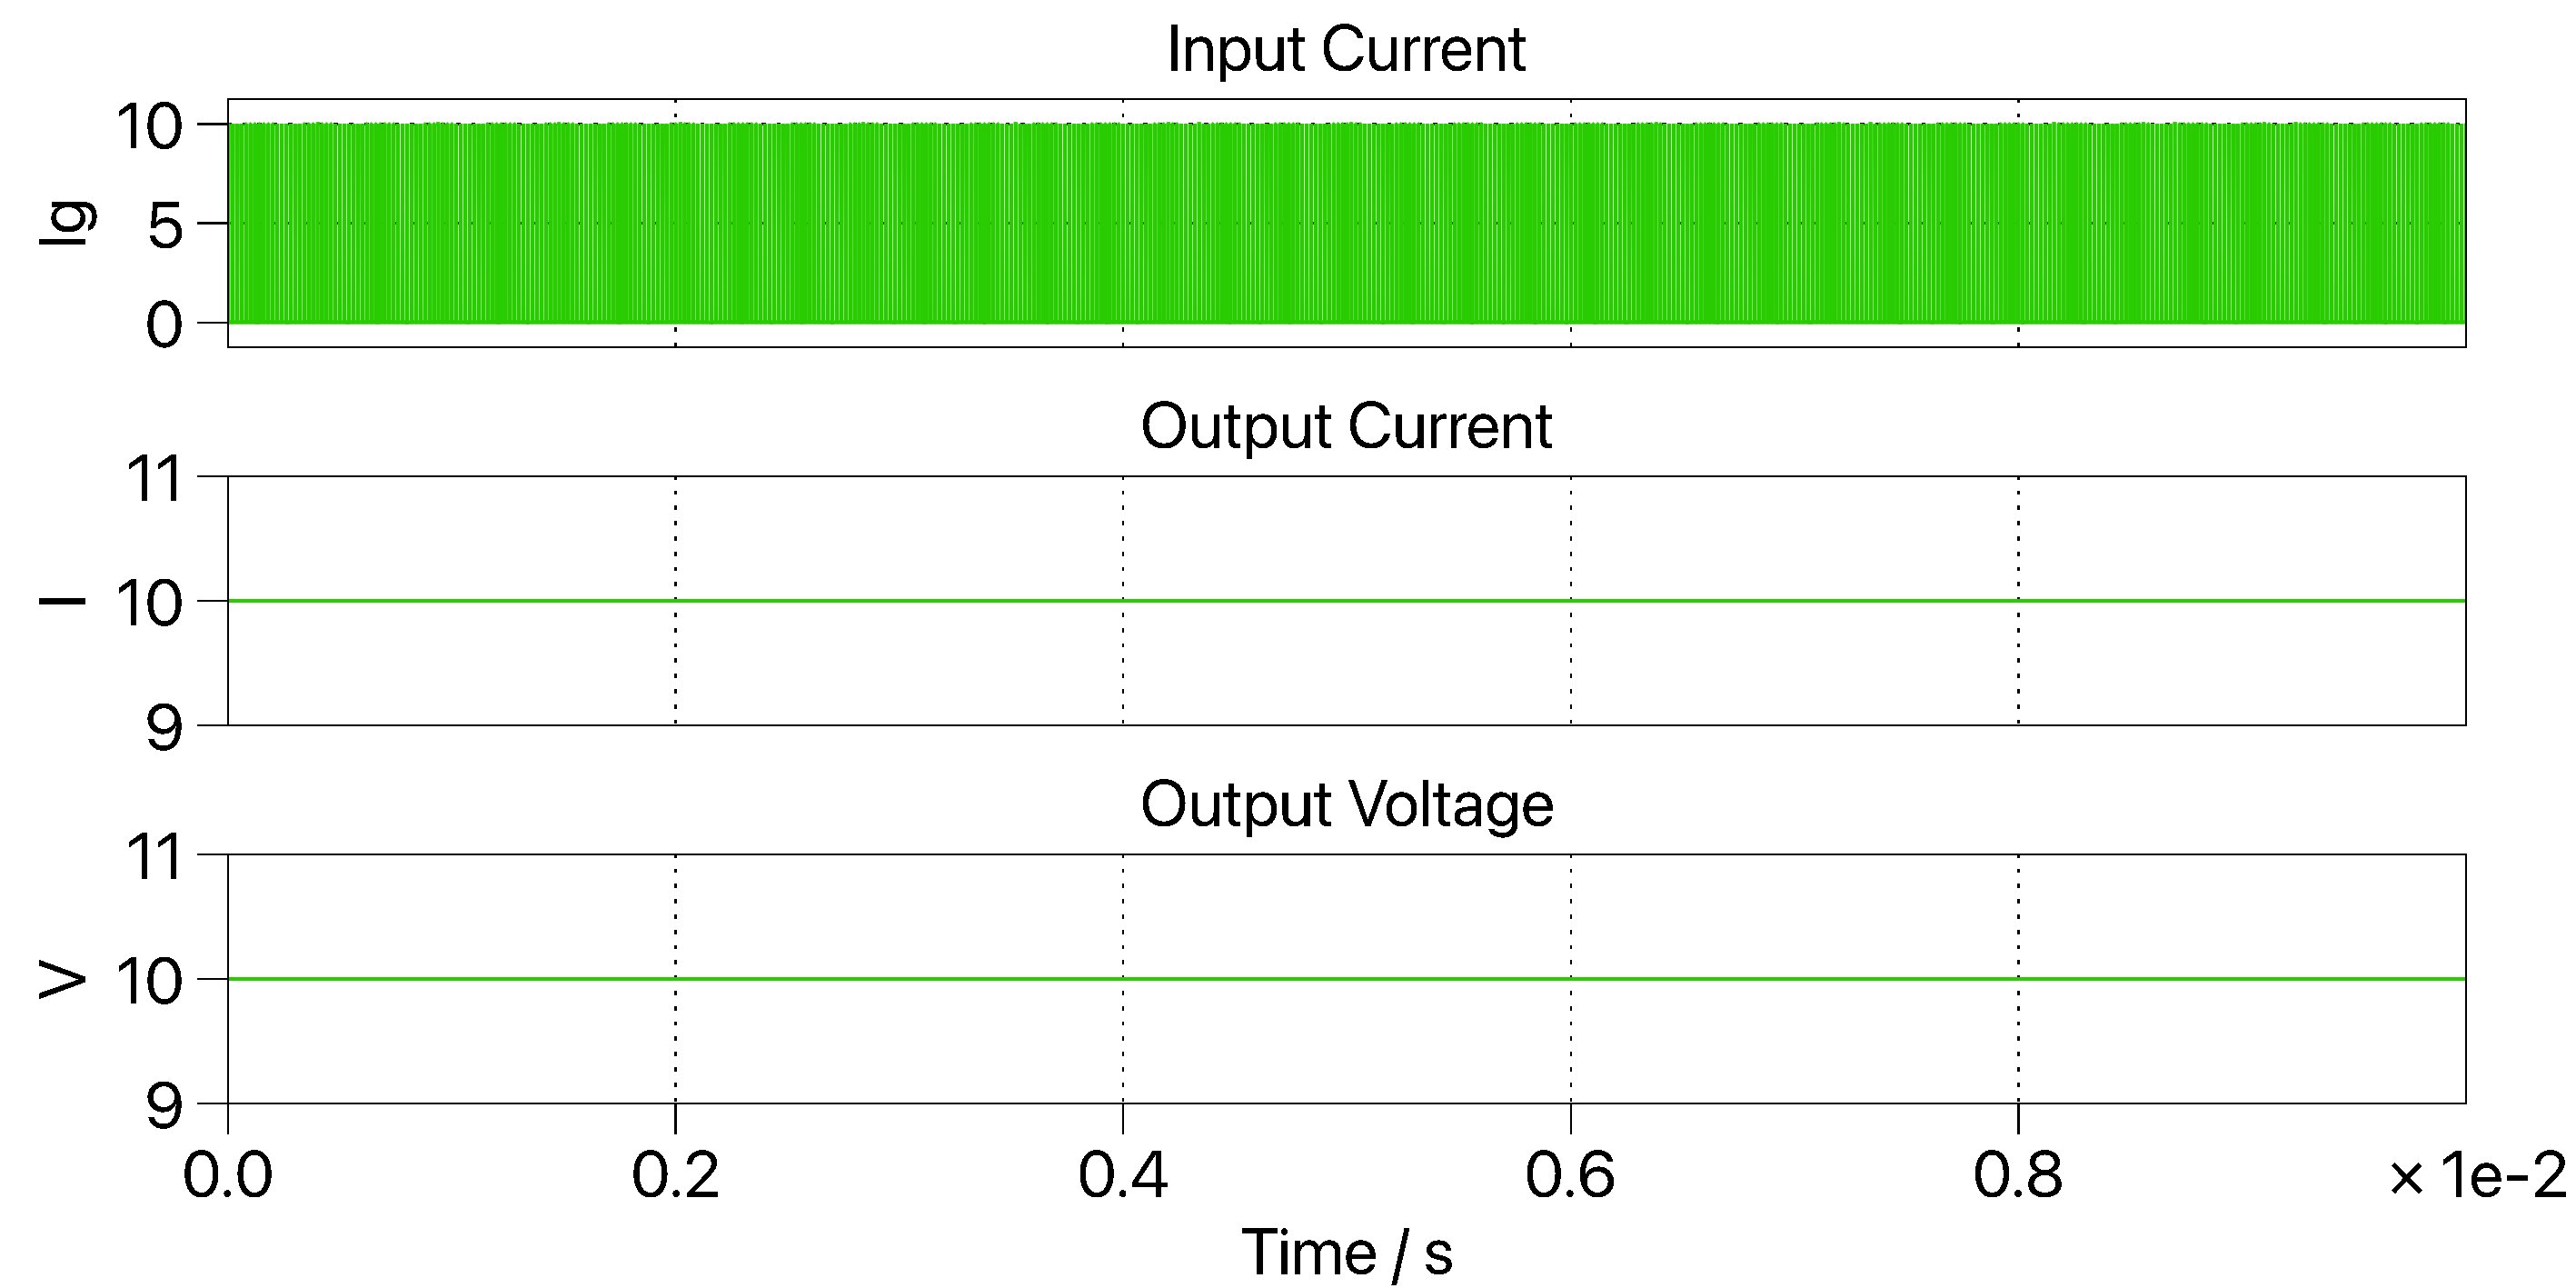
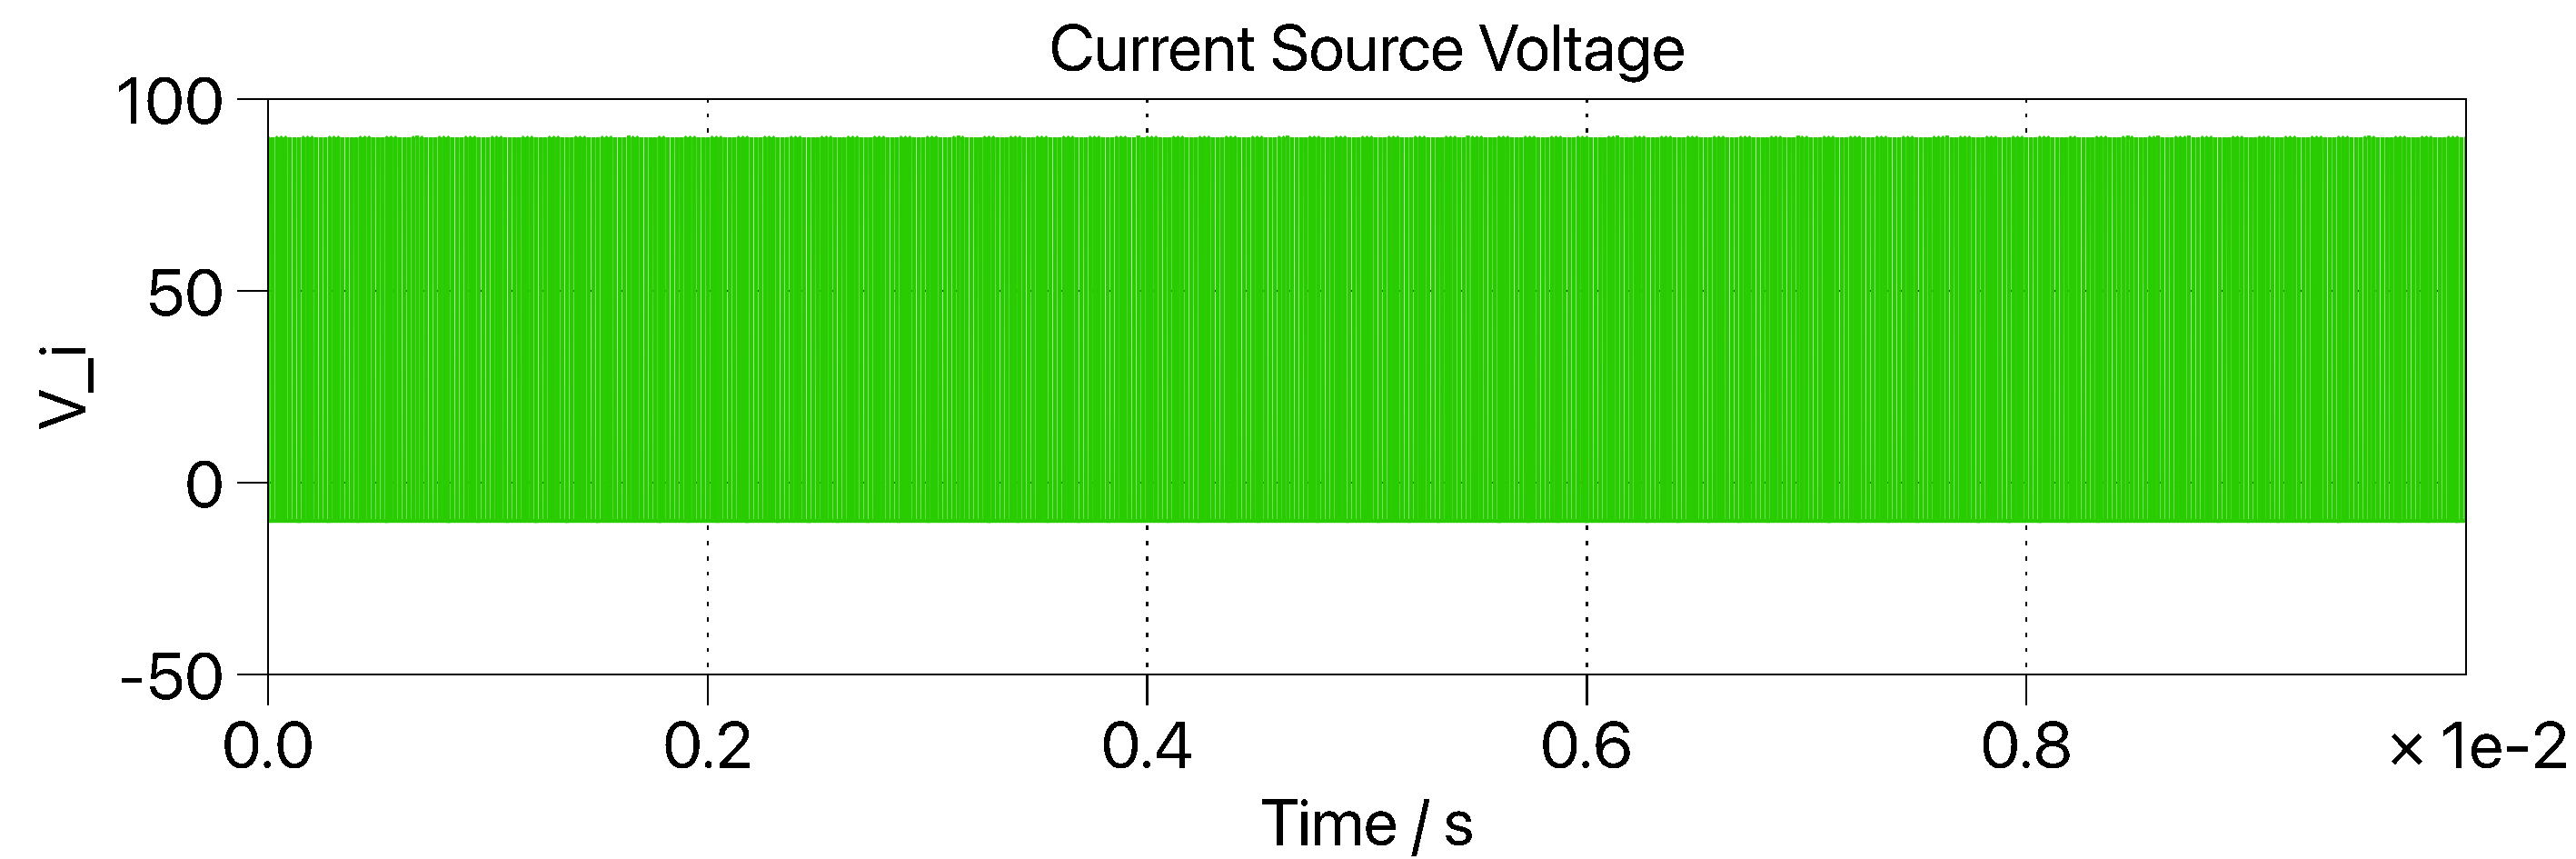
Input Current (Ig) peak: 10A

Input Current (Ig) avg: D\*10A = 0.1*10A = 1A


Output Current (I) peak: 10A

Output Current (I) avg: 10A


Output Voltage (V) peak: 10V

Output Voltage (V) avg: 10V

Inductor/Current Source Current (V_i) peak: 90A

Inductor/Current Source Current (V_i) average: D\*90A = 0.1*90A = 9A

#### Q2: Which waveforms have a small (or no) ripple versus large ripple?

Input current and current source current have a large ripple while output current and output voltage have no ripple.

#### Q3: Which components supply power and which dissipate power?

The voltage source supplies power while the load resistor dissipates power.

### Now replace the current-source by an inductor with a value of 1 mH and re-run the simulation.
#### Q4: How are the waveforms different? What do they have in common with the prior simulation?
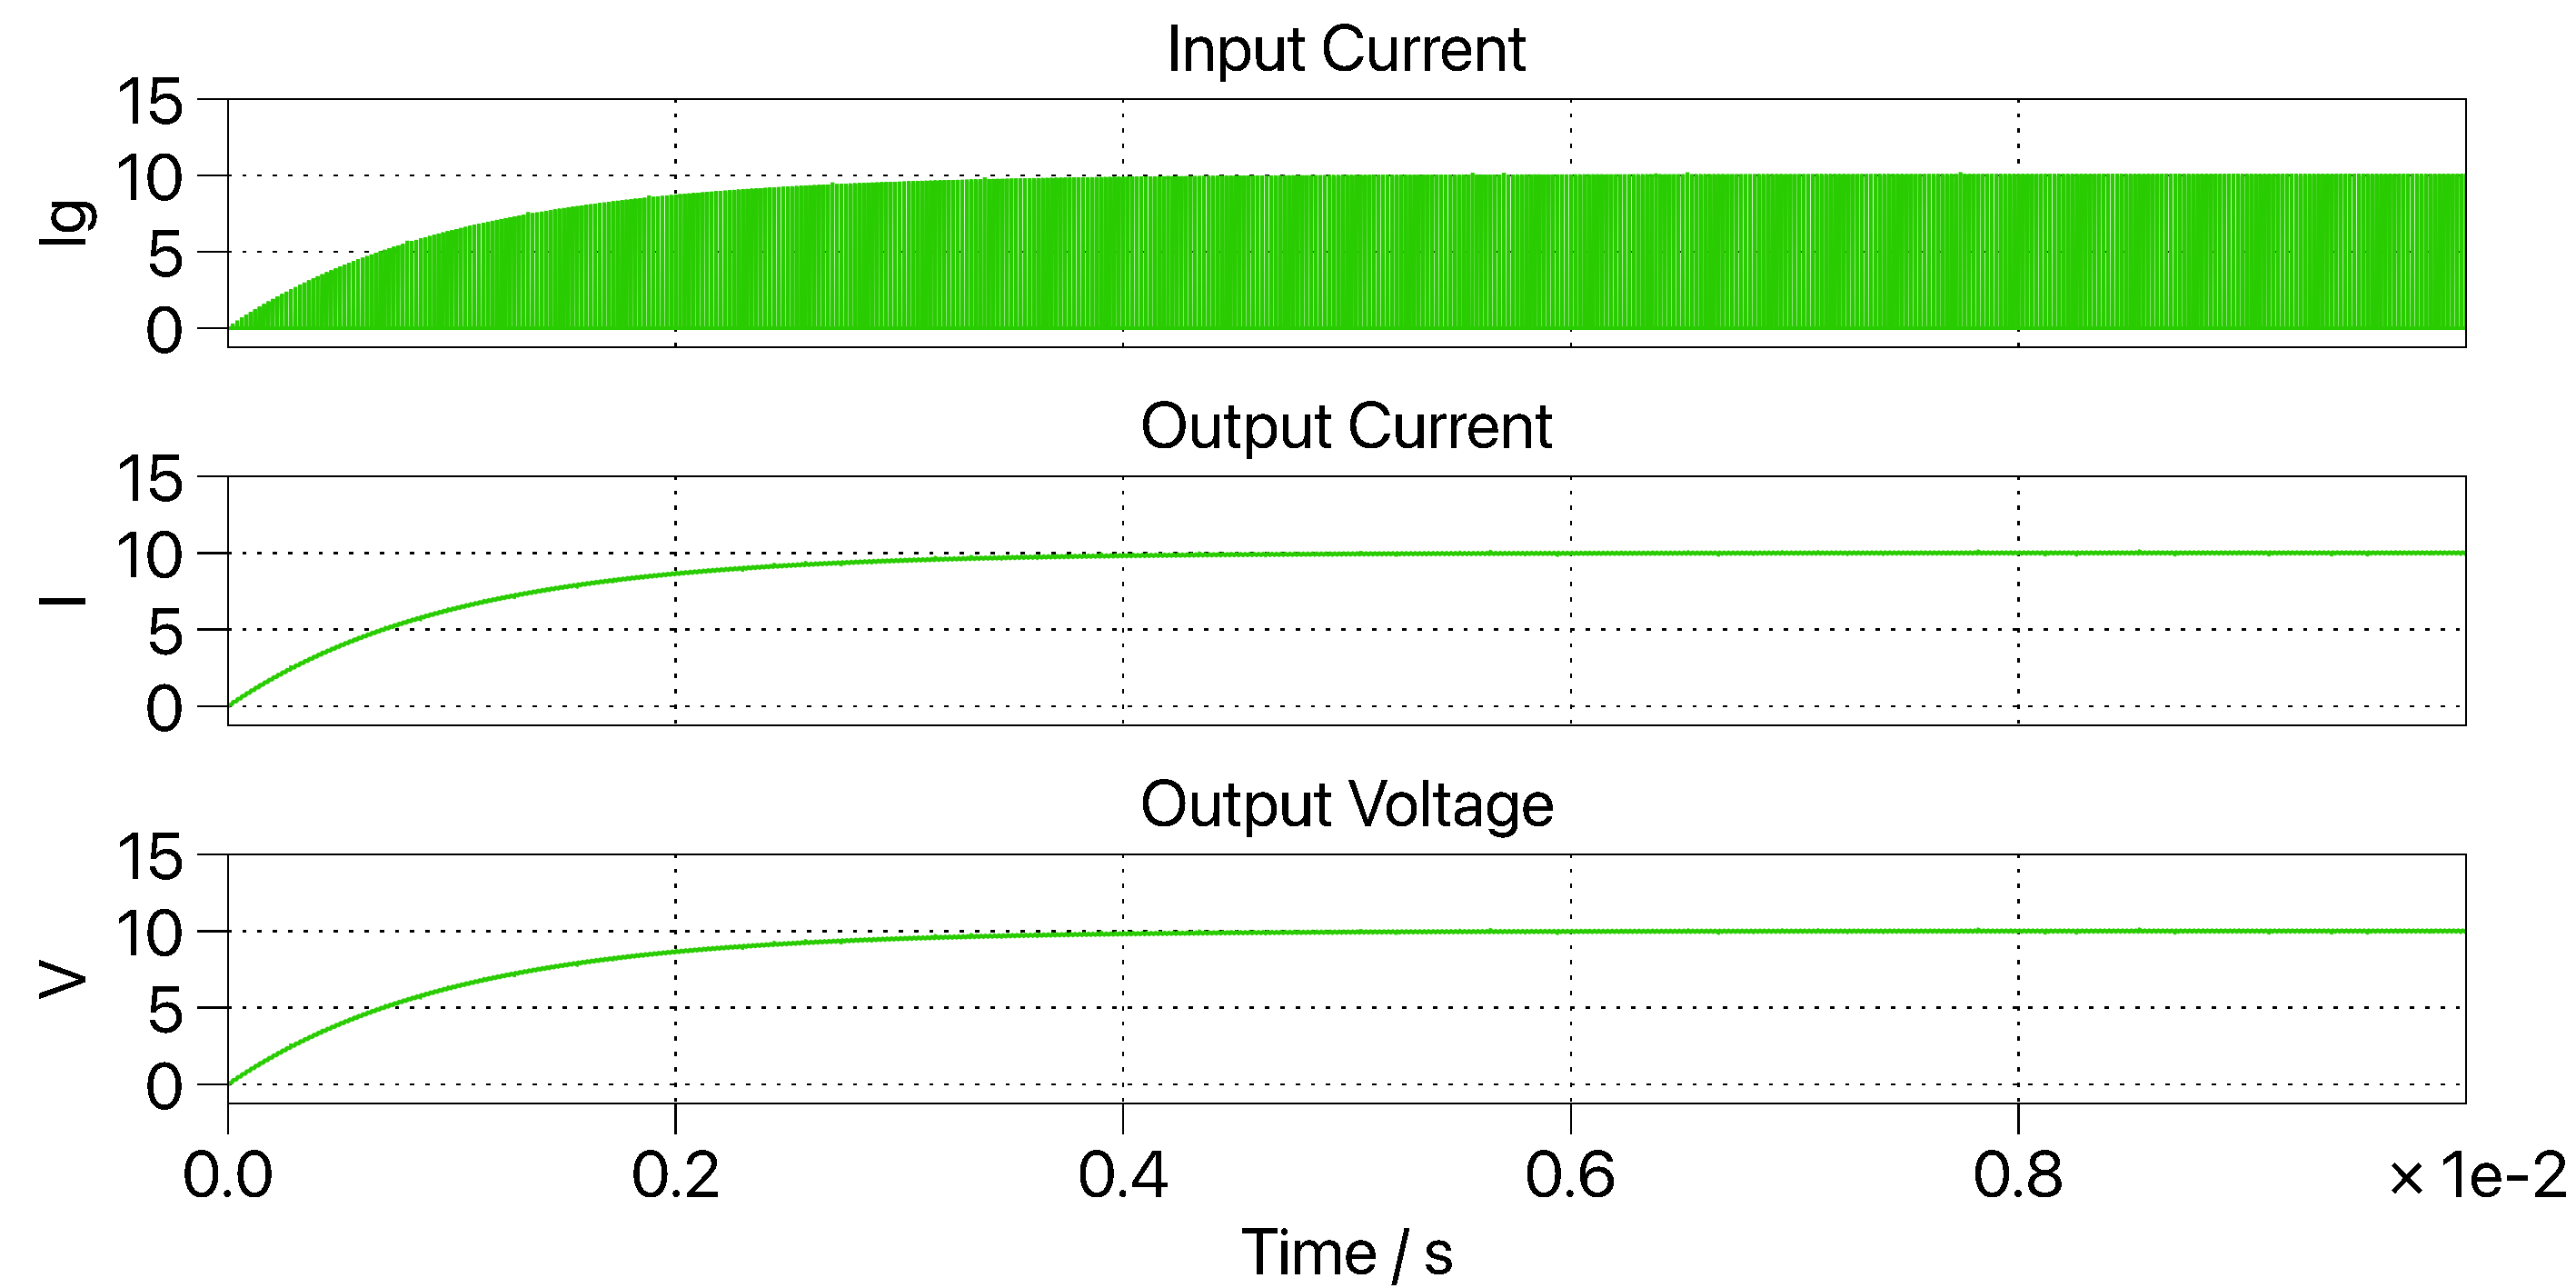
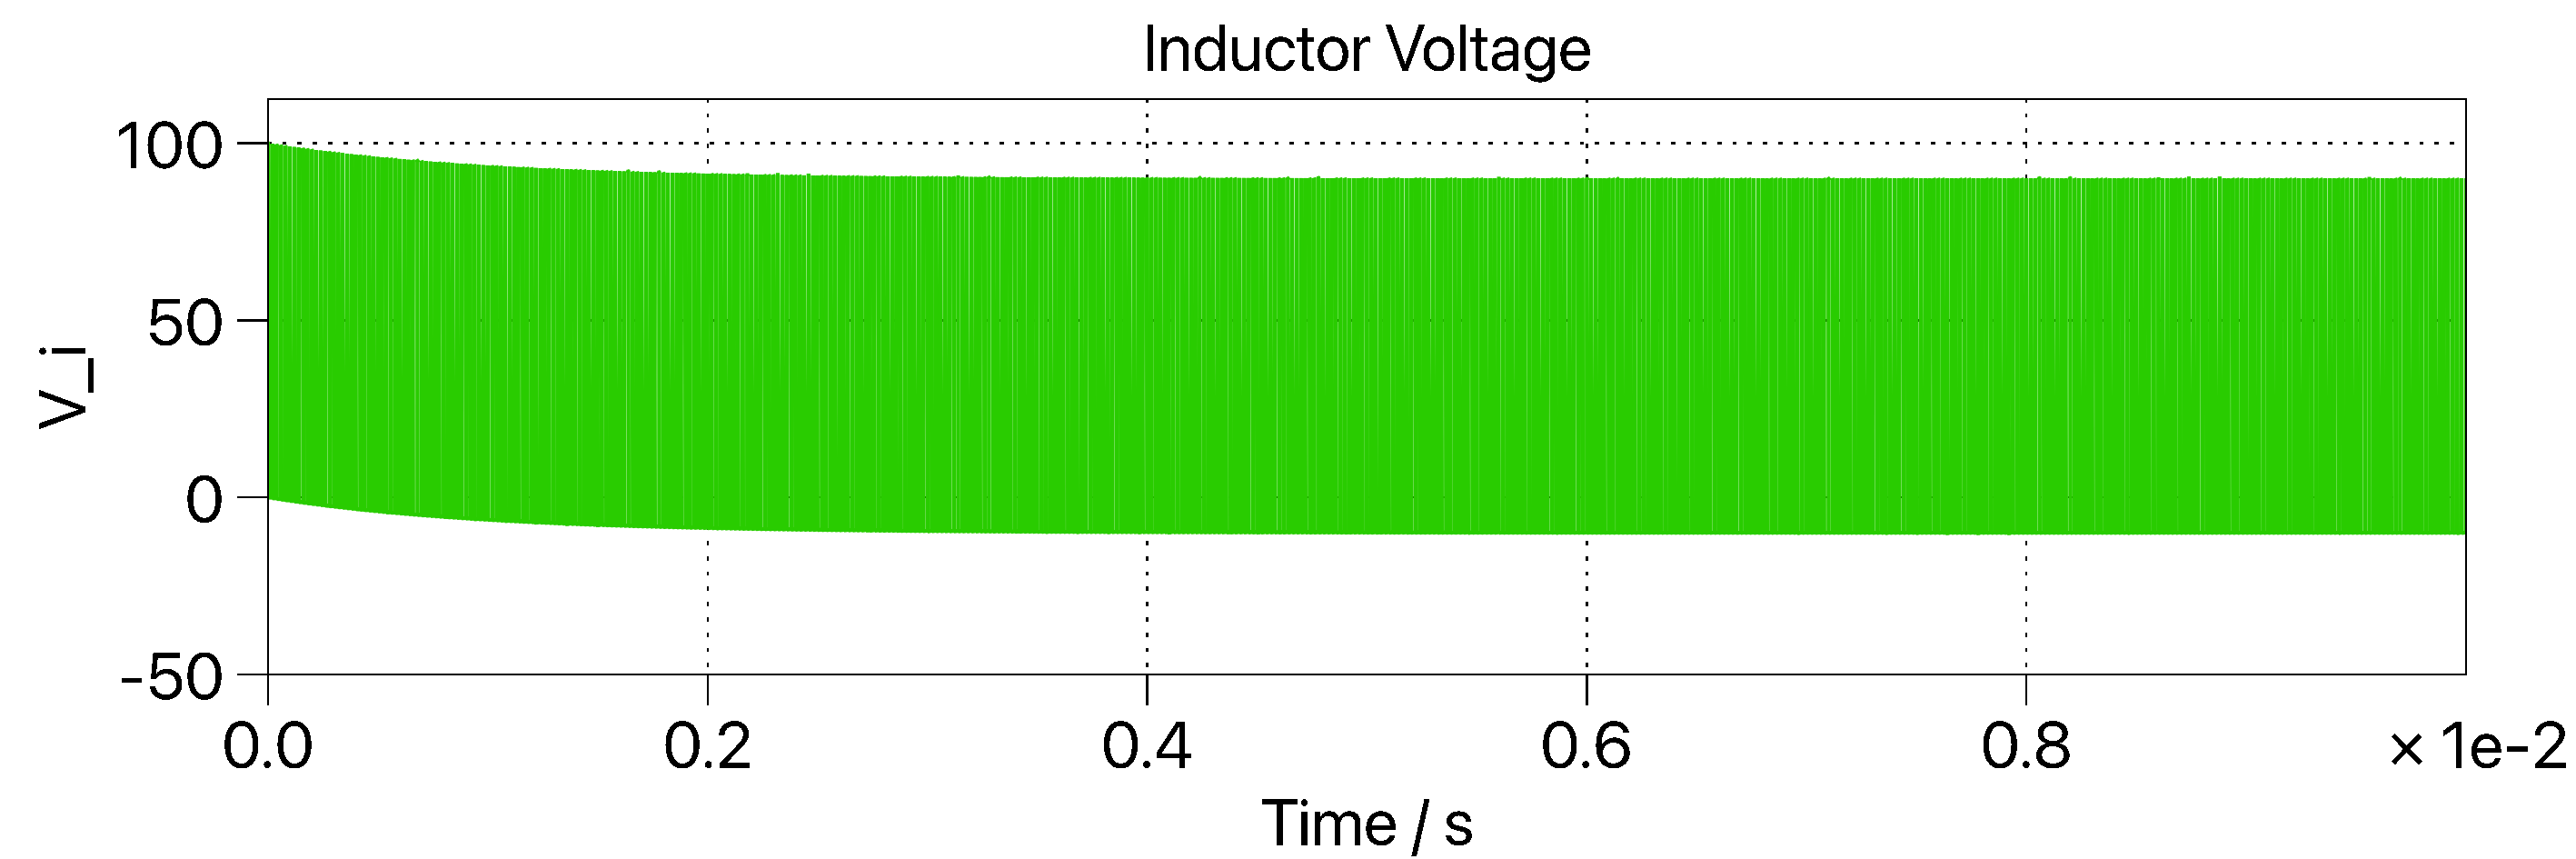

In the previous simulation, the input current is a perfect square wave with no ramping whatsoever. Note that the timescale on this second set of plots is 1e-2 seconds instead of 1e-4 seconds to get a better picture of the overall behavior of the current. The first image had an intentional 1e-4 timescale so you can see the exact shape of the small and unvarying in steady state waveform of the input current.

Similarities: The maximum currents and output voltage values are the same as in the prior simulation. The duty cycle is the same, which means they switch at the same time. The inductor voltage starts at 100V and oscillates according to the same duty cycle.

Differences: The voltage now slowly ramps up over the course of a few tenths of a second as a result of the time constant from the RL circuit. There is now significant ripple in the output current and output voltage as well. The ripple at steady state has a sawtooth shape (the beginnings of a logarithmic curve). Over time the maximum and average inductor voltages slowly decrease and reach an average steady state voltage lower than that of the original simulation.



#### Q5: After how much time does the circuit reach periodic steady-state?

In [3]:
5*1e-3/1 # Steady state time in seconds: 5*time constant = 5L/R

0.005

#### Q6: What is the average voltage across the inductor in periodic steady-state?
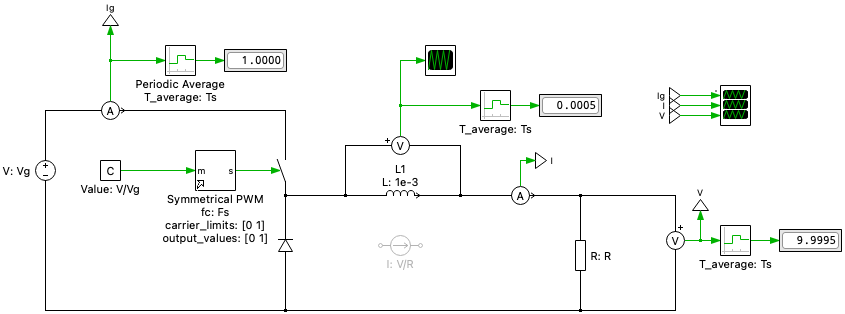

0.0005V (As seen in the block connected to T_average: Ts on the voltage measurement around the inductor)

#### Q7: What is the voltage conversion ratio for D=10% and D=50%?
M = V/Vg; V=D*Vg

M = D\*Vg/Vg = D

D=10%: M=0.1

D=50%: M=0.5

#### Q8: How are the waveforms changed with 10 uH? Comment thoroughly.
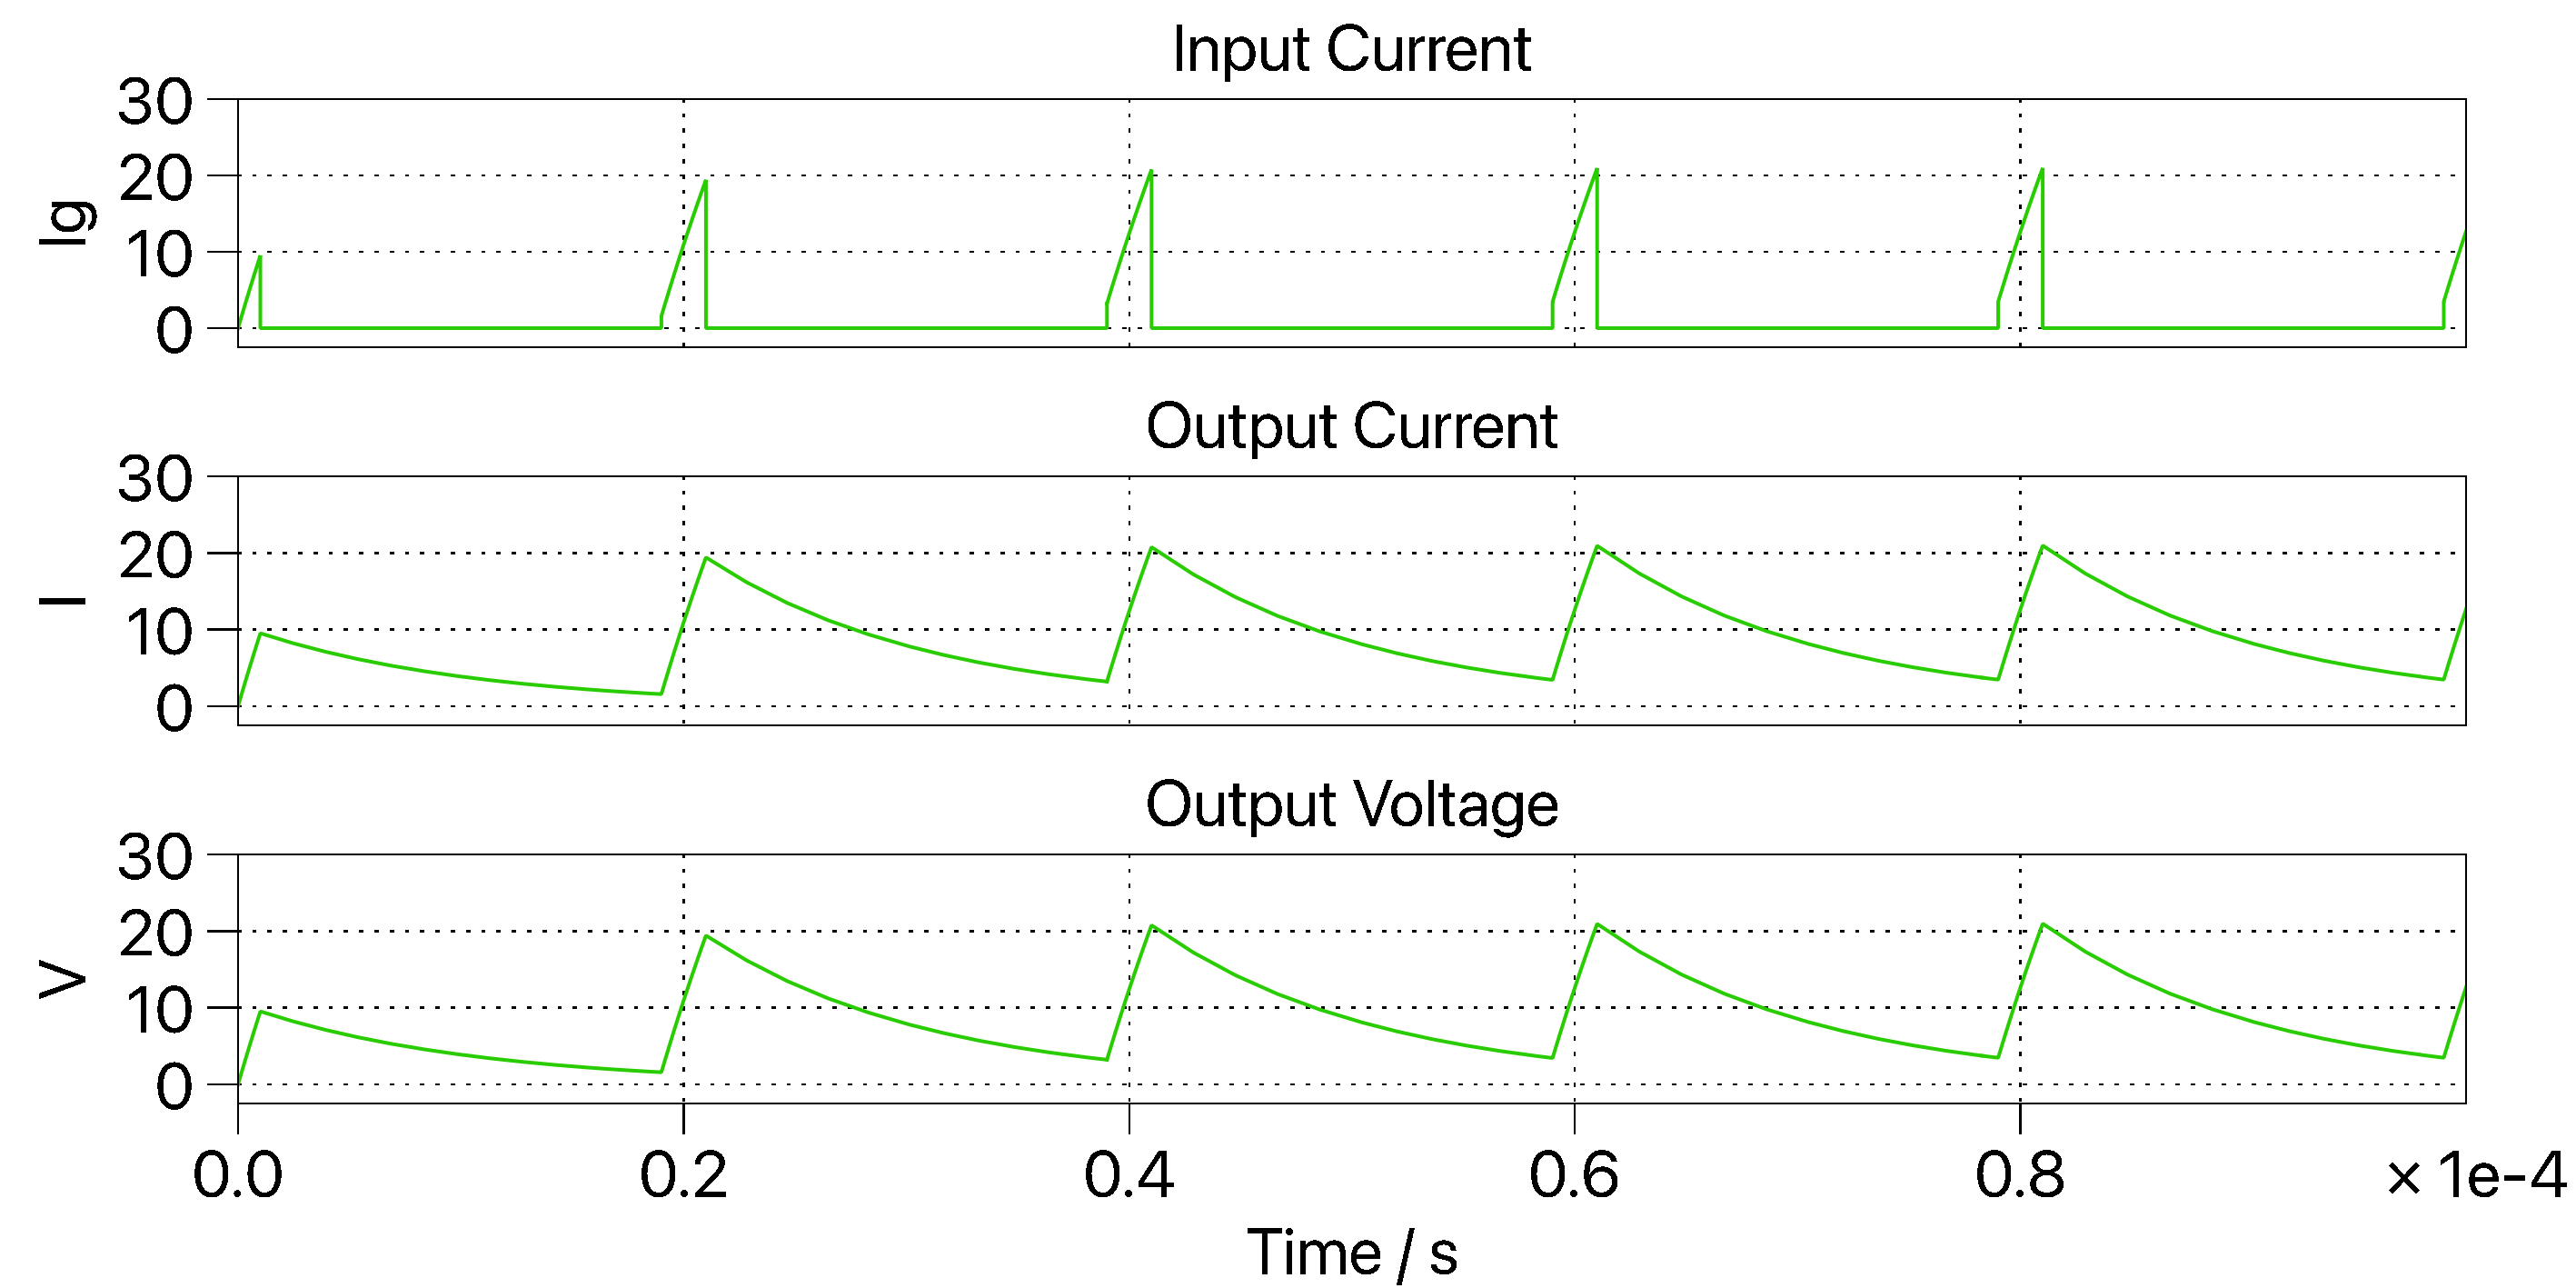
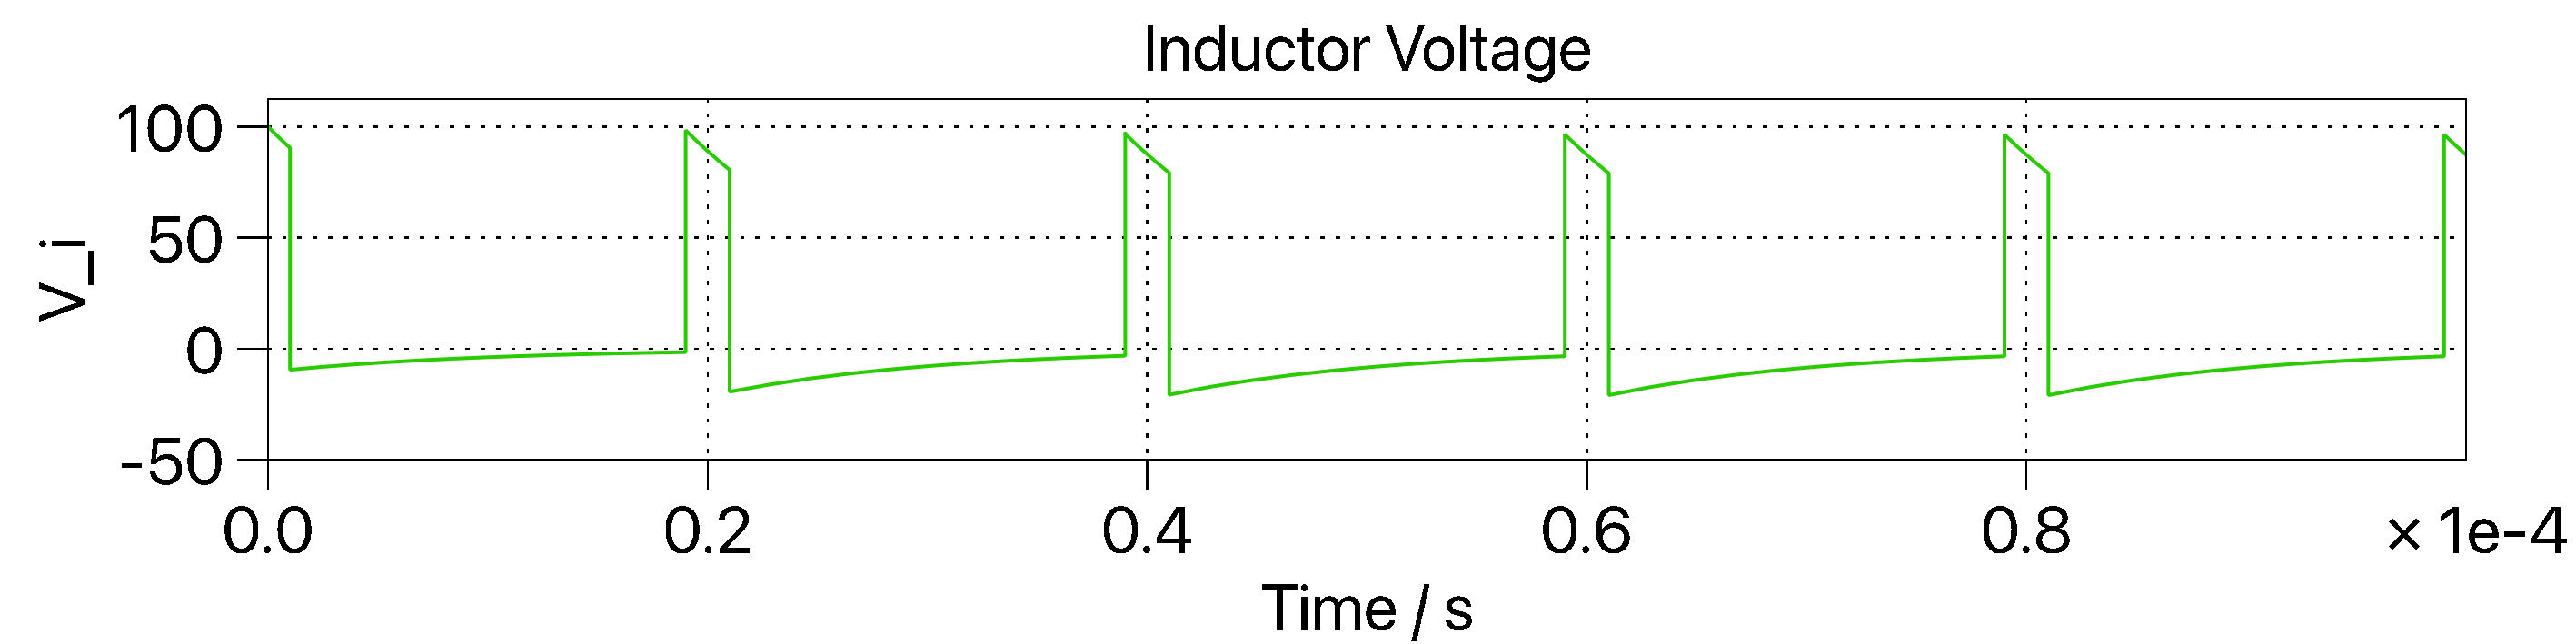

The sawtooth shape on the output current and output voltage waves is visibly rounded, as is the eventual inductor voltage, 